In [42]:
library(tidyverse)
library(repr)
library(lubridate)
library(tidymodels)
library(janitor)
#options(repr.matrix.max.rows = 6)

In [43]:
# Read player and session data
players <- read_csv("data/players.csv") |>
    clean_names()

sessions <- read_csv("data/sessions.csv") |>
    clean_names()

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


How well can player characteristics (experience level, gender, age) and behaviours (total sessions, average session duration, days active) classify newsletter subscribers versus non-subscribers in this Minecraft dataset?

In [44]:
# Clean and Convert Session Data 
# Convert start_time and end_time to datetime, compute session length (minutes)

players <- players |>
  mutate(subscribe = as.factor(subscribe))

sessions <- sessions |>
  mutate(
    starting_time = dmy_hm(start_time),
    ending_time = dmy_hm(end_time),
    session_length = as.numeric(ending_time - starting_time, units = "mins"))

# Aggregate Session Data to Player Level 
# Calculate player-level session features
session_summary <- sessions |>
    group_by(hashed_email) |>
    summarise(total_sessions = n(),
    avg_session_duration = mean(session_length, na.rm = TRUE),
    days_active = n_distinct(as.Date(start_time)) 
  ) 

# Merge Player and Session Data
player_summary <- players |>
    left_join(session_summary, by = "hashed_email") |>
    mutate(
    total_sessions = replace_na(total_sessions, 0),
    avg_session_duration = replace_na(avg_session_duration, 0),
    days_active = replace_na(days_active, 0)
  )

player_summary

experience,subscribe,hashed_email,played_hours,name,gender,age,total_sessions,avg_session_duration,days_active
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27,74.77778,18
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3,85.00000,2
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1,5.00000,1
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1,50.00000,1
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1,9.00000,1
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,0,0.00000,0
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,0,0.00000,0
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,1,5.00000,1
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,1,13.00000,1


In [45]:
player_full <- player_summary |>
  select(subscribe, age, total_sessions, avg_session_duration, days_active) 

# subscribe_percent <- subscribe |>
#   count(subscribe) |>
#   mutate(percent = n / sum(n) * 100)

# player_full


In [46]:
#splitting the data set..
set.seed(25)
player_split <- initial_split(player_full, prop = 0.75, strata = subscribe)
    training_set <- training(player_split)
    testing_set <- testing(player_split)



→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 48 rows.
               ✖ Assigned data has 49 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 49 to size 48.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

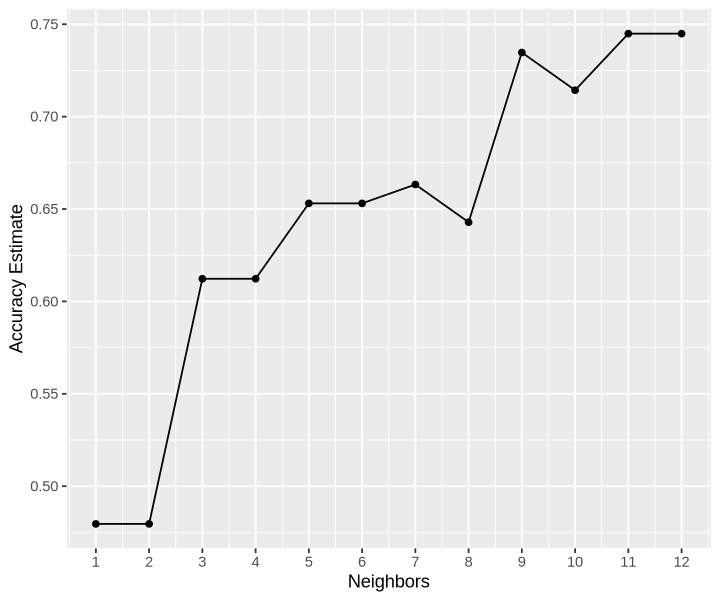

In [47]:
options(repr.plot.height = 5, repr.plot.width = 6)


knn_recipe <- recipe(subscribe ~., data = training_set) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_vfold <- vfold_cv(training_set, v = 3, strata = subscribe)
k_vals = tibble(neighbors = seq(from = 1, to = 12, by = 1))

knn_results <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = knn_vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- knn_results |>
    filter(.metric == "accuracy") 

cross_val_plot <- accuracies |> 
    ggplot(aes(x = neighbors, y = mean)) + 
    geom_point() + geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +  
    scale_x_continuous(breaks = seq(1, 12, by = 1)) 
    theme(text = element_text(size=20))  
cross_val_plot

# error below doesnt impact results



In [62]:
#...

testing_set <- testing_set |>
  mutate(across(where(is.numeric), ~ replace_na(., 0)))

new_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
    set_engine("kknn") |>
    set_mode("classification")

new_knn_fit <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(new_knn_spec) |>
    fit(data = training_set)

knn_predictions <- predict(new_knn_fit, testing_set) |>
    bind_cols(testing_set)

knn_predictions

knn_metrics <- knn_predictions |> 
    metrics(truth = subscribe, estimate = .pred_class)


knn_conf_mat <- knn_predictions |> 
    conf_mat(truth = subscribe, estimate = .pred_class)

knn_metrics
knn_conf_mat

.pred_class,subscribe,age,total_sessions,avg_session_duration,days_active
<fct>,<fct>,<dbl>,<int>,<dbl>,<int>
TRUE,TRUE,9,27,74.77778,18
TRUE,TRUE,21,1,9.00000,1
TRUE,TRUE,19,0,0.00000,0
TRUE,FALSE,21,1,5.00000,1
TRUE,TRUE,17,0,0.00000,0
TRUE,TRUE,17,0,0.00000,0
TRUE,TRUE,17,2,21.50000,2
TRUE,TRUE,19,2,23.00000,1
TRUE,TRUE,21,1,50.00000,1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.73469388
kap,binary,0.06734993


          Truth
Prediction FALSE TRUE
     FALSE     1    1
     TRUE     12   35